Reference: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Purpose
研究客戶流失(churn)的相關議題

(1) 客戶離開組織的可能性有多大？ 
(2) 客戶流失的關鍵指標是什麼？ 
(3) 可以根據結果實施哪些保留策略以減少潛在客戶流失？

# 1. import data

In [2]:
# conda install -c anaconda py-xgboost

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 1-1 Restart the session

In [4]:
try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass

## 1-2 Import relevant libraries

In [5]:
#Standard libraries for data analysis:  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sns # For creating plots
sns.set_style('darkgrid')

In [6]:
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
#sklearn modules for Model Evaluation & Improvement:   
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

In [9]:
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

In [10]:
#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

## 1-3 Read data:

In [11]:
dataset = pd.read_csv('customer_churn_data.csv')
dataset.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## 1-4 Evaluate data structure

0   customerID       
1   gender: 男性或女性            
2   SeniorCitizen: 客戶是否是老年人 (1, 0)     
3   Partner: 客戶是否有合作夥伴 (Yes, No)               
4   Dependents: 客戶是否有家屬 (Yes, No)      
5   tenure: 客戶停留的月數             
6   PhoneService: 客戶是否有電話服務 (Yes, No)      
7   MultipleLines: 客戶是否有多條線路 (Yes, No, No phone service)     
8   InternetService: 客戶的互聯網服務提供商 (DSL, Fiber optic, No)      
9   OnlineSecurity: 客戶是否有 online security (Yes, No, No internet service)    
10  OnlineBackup: 客戶是否有在線備份 (Yes, No, No internet service)       
11  DeviceProtection: 客戶是否有設備保護 (Yes, No, No internet service)       
12  TechSupport: 客戶是否有技術支持 (Yes, No, No internet service)       
13  StreamingTV: 客戶是否有 streaming TV (Yes, No, No internet service)       
14  StreamingMovies: 客戶是否有 streaming movies (Yes, No, No internet service)      
15  Contract: 客戶的合約期限 (Month-to-month, One year, Two year)         
16  PaperlessBilling: 客戶是否有無紙化計費 (Yes, No)      
17  PaymentMethod: 客戶的付款方式 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))   
18  MonthlyCharges: 每月向客戶收取的金額     
19  TotalCharges: 向客戶收取的總金額   
20  Churn: 客戶是否流失 (Yes or No)        

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(object)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
dataset.head()



customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### <span style="color:#3498DB">Point: 請就下列敘述性統計進行分析</span>

In [14]:
dataset.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

客戶平均停留 32 個月，每月支付 64 美元，共支付2,283美元。 但是，不同客戶有不同的合約。

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
import pandas as pd

# 先将 TotalCharges 列转换为数值类型，如果有无法转换的数据，将其设置为 NaN
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

# 计算不同合约期间的平均停留月数，月费和总费用
result = dataset.groupby(['Contract'], as_index=True)[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

print(result)


                   tenure  MonthlyCharges  TotalCharges
Contract                                               
Month-to-month  18.036645       66.398490   1369.254581
One year        42.044807       65.048608   3034.683084
Two year        56.735103       60.770413   3728.933947


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [18]:
# 不同的合約期間，停留月數和付費情況是否有差異
dataset.groupby(['Contract'], as_index=True)[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()



tenure  MonthlyCharges  TotalCharges
Contract                                               
Month-to-month  18.036645       66.398490   1369.254581
One year        42.044807       65.048608   3034.683084
Two year        56.735103       60.770413   3728.933947

### <span style="color:#3498DB">Point: 請進一步分析你想看到的數據
* 如：不同性別&contract，人數是否有所差異？

In [19]:
dataset.pivot_table(index=['gender', 'Contract'], values='customerID', 
                    margins=True, aggfunc=['count'], margins_name= 'Total count')

count
                           customerID
gender      Contract                 
Female      Month-to-month       1925
            One year              718
            Two year              845
Male        Month-to-month       1950
            One year              755
            Two year              850
Total count                      7043

# 2. Data preprocessing

## 2-1 處理NA

In [20]:
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
#Removing missing values 
dataset.dropna(inplace = True)

## 2-2 清整數據並轉dummy variable

In [22]:
#Remove customer IDs from the data set
df = dataset.iloc[:,1:]

#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0       1           29.85         29.85      0           True        False   
1      34           56.95       1889.50      0          False         True   
2       2           53.85        108.15      1          False         True   
3      45           42.30       1840.75      0          False         True   
4       2           70.70        151.65      1           True        False   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0             True            False       False         True           True   
1             True            False        True        False           True   
2             True            False        True        False           True   
3             True            False        True        False           True   
4             True            False        True        False           True   

   Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0           False             True             False             False   
1           False            False              True              True   
2           False            False              True              True   
3           False             True             False             False   
4           False            False              True              True   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                            True              False                 True   
1                           False              False                 True   
2                           False              False                 True   
3                            True              False                 True   
4                           False              False                False   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                        False               False               True   
1                        False               False              False   
2                        False               False              False   
3                        False               False              False   
4                         True               False               True   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                               False               False            False   
1                               False                True             True   
2                               False                True            False   
3                               False                True             True   
4                               False               False             True   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                             False              True                 True   
1                             False             False                False   
2                             False              True                 True   
3                             False             False                False   
4                             False             False                 True   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                 False                 False            True   
1                                 False                  True            True   
2                                 False                 False            True   
3                                 False                  True           False   
4                                 False                 False            True   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                            False            False            True   
1                            False            False            True   
2                            False            False            True   
3  

# 3. Descriptive statistics

## A. Demographics 

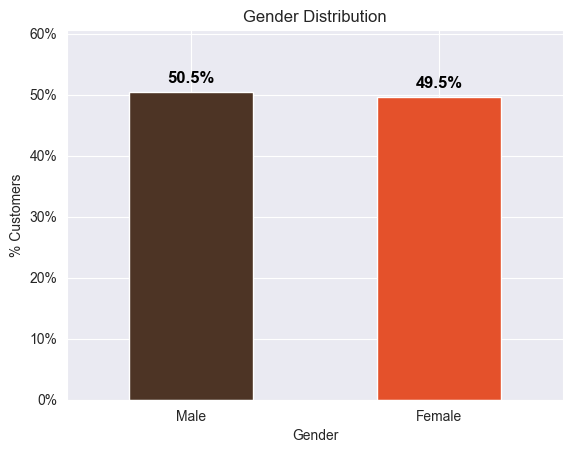

In [23]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True, rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),  # Annotation point
                xytext=(0, 10),  # Offset of the text label from the annotation point
                textcoords='offset points',  # Coordinate system for the offset
                ha='center', va='center', color='black', fontsize=12, fontweight='bold')

# Ensure labels are visible
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.2)

plt.show()
           

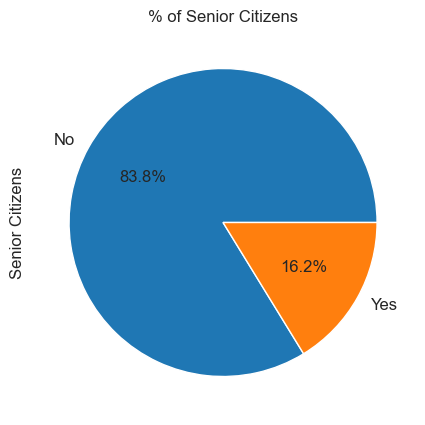

In [24]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

plt.show()

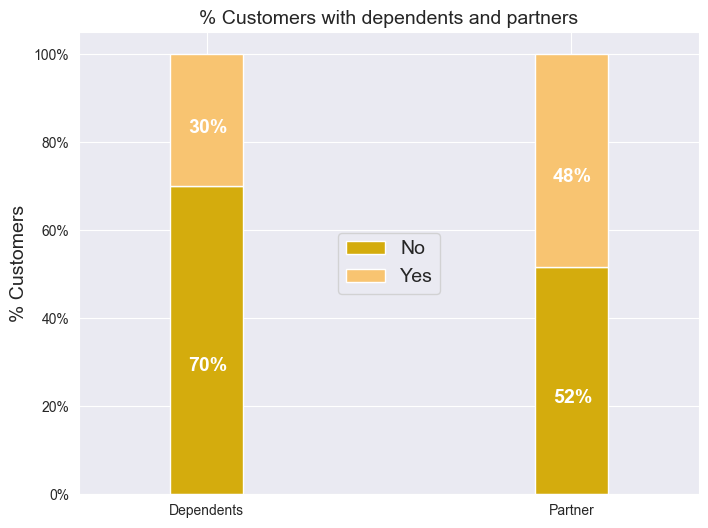

In [25]:
df2 = pd.melt(dataset, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(dataset)
colors = ['#D4AC0D','#F8C471']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
                weight = 'bold',
                size = 14)
    
# Dependents: 客戶是否有家屬 (Yes, No)  
# Partner: 客戶是否有合作夥伴 (Yes, No)       



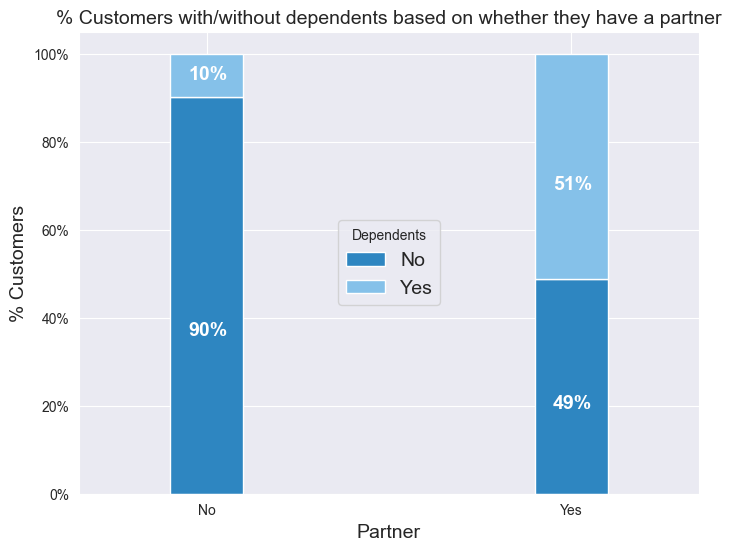

In [26]:
colors = ['#2E86C1','#85C1E9']
partner_dependents = dataset.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents', fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

在有合作夥伴的客戶中，只有大約一半也有受撫養人，而另一半為單身。        
此外，在沒有合作夥伴的客戶中，大多數 (90%) 為單身。

## B. Customer Account Information:

### <span style="color:#3498DB">Question: 請說明客戶停留月數的情況 </span>

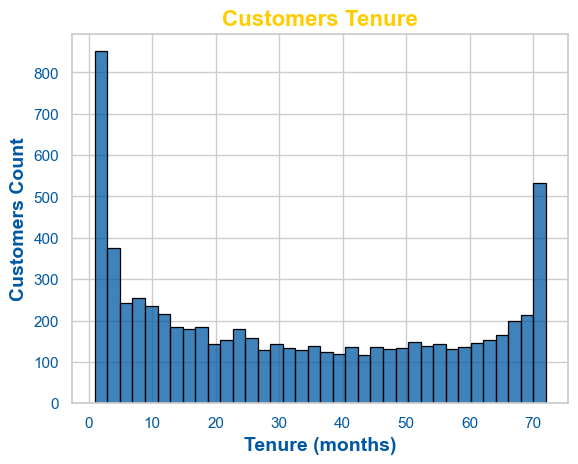

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set IKEA-style colors and font
ikea_blue = '#0058A3'
ikea_yellow = '#FFCC00'
sns.set(style="whitegrid")

# Plot
ax = sns.histplot(df['tenure'], 
                  bins=int(180/5), 
                  color=ikea_blue, 
                  edgecolor='black')

# Labels and title
ax.set_ylabel('Customers Count', fontsize=14, fontweight='bold', color=ikea_blue)
ax.set_xlabel('Tenure (months)', fontsize=14, fontweight='bold', color=ikea_blue)
ax.set_title('Customers Tenure', fontsize=16, fontweight='bold', color=ikea_yellow)

# Customize tick parameters
ax.tick_params(axis='x', colors=ikea_blue)
ax.tick_params(axis='y', colors=ikea_blue)

# Show plot
plt.show()


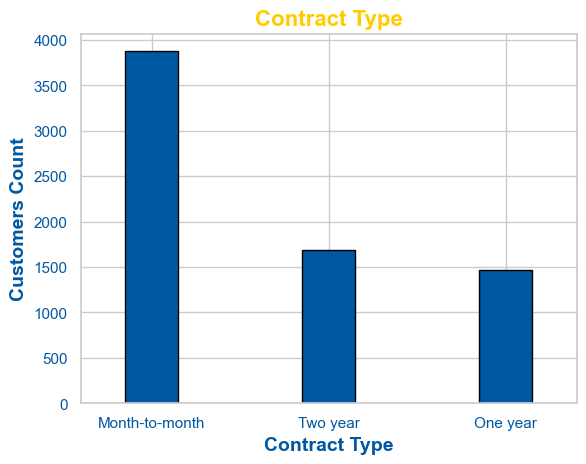

In [28]:

# Plot
ax = df['Contract'].value_counts().plot(kind='bar', color=ikea_blue, edgecolor='black', rot=0, width=0.3)

# Labels and title
ax.set_ylabel('Customers Count', fontsize=14, fontweight='bold', color=ikea_blue)
ax.set_xlabel('Contract Type', fontsize=14, fontweight='bold', color=ikea_blue)
ax.set_title('Contract Type', fontsize=16, fontweight='bold', color=ikea_yellow)

# Customize tick parameters
ax.tick_params(axis='x', colors=ikea_blue)
ax.tick_params(axis='y', colors=ikea_blue)

# Show plot
plt.show()


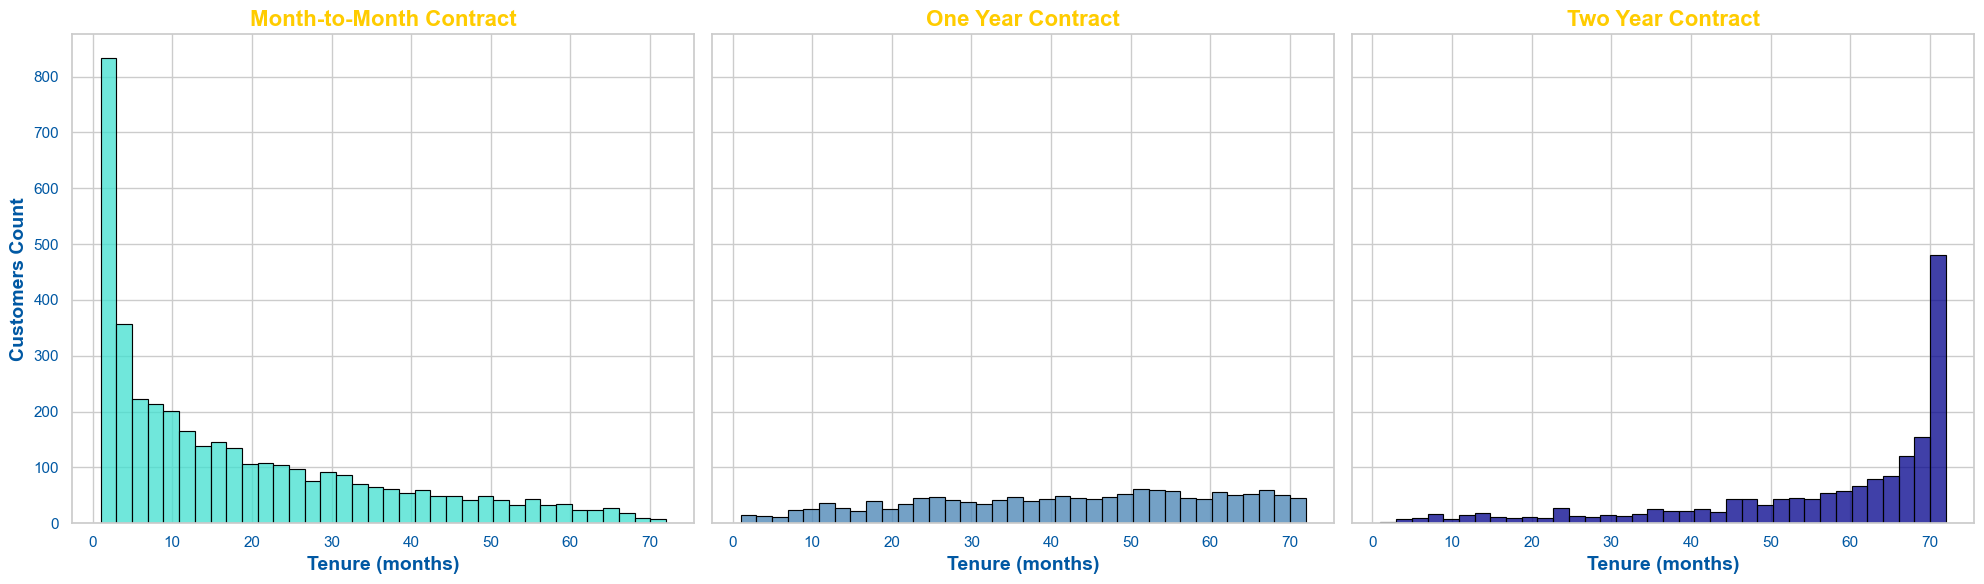

In [29]:

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Month-to-month contract
ax1 = sns.histplot(df[df['Contract'] == 'Month-to-month']['tenure'],
                   bins=int(180/5), color='turquoise',
                   edgecolor='black', ax=ax1)
ax1.set_ylabel('Customers Count', fontsize=14, fontweight='bold', color=ikea_blue)
ax1.set_xlabel('Tenure (months)', fontsize=14, fontweight='bold', color=ikea_blue)
ax1.set_title('Month-to-Month Contract', fontsize=16, fontweight='bold', color=ikea_yellow)
ax1.tick_params(axis='x', colors=ikea_blue)
ax1.tick_params(axis='y', colors=ikea_blue)

# One year contract
ax2 = sns.histplot(df[df['Contract'] == 'One year']['tenure'],
                   bins=int(180/5), color='steelblue',
                   edgecolor='black', ax=ax2)
ax2.set_xlabel('Tenure (months)', fontsize=14, fontweight='bold', color=ikea_blue)
ax2.set_title('One Year Contract', fontsize=16, fontweight='bold', color=ikea_yellow)
ax2.tick_params(axis='x', colors=ikea_blue)
ax2.tick_params(axis='y', colors=ikea_blue)

# Two year contract
ax3 = sns.histplot(df[df['Contract'] == 'Two year']['tenure'],
                   bins=int(180/5), color='darkblue',
                   edgecolor='black', ax=ax3)
ax3.set_xlabel('Tenure (months)', fontsize=14, fontweight='bold', color=ikea_blue)
ax3.set_title('Two Year Contract', fontsize=16, fontweight='bold', color=ikea_yellow)
ax3.tick_params(axis='x', colors=ikea_blue)
ax3.tick_params(axis='y', colors=ikea_blue)

# Adjust layout
plt.tight_layout()
plt.show()


### <span style="color:#3498DB">Question: 請問上述三種合約期間有何特性？ 你會建議公司對合約期間有何種設定</span>

## C. Look at the distribution of various services used by customers

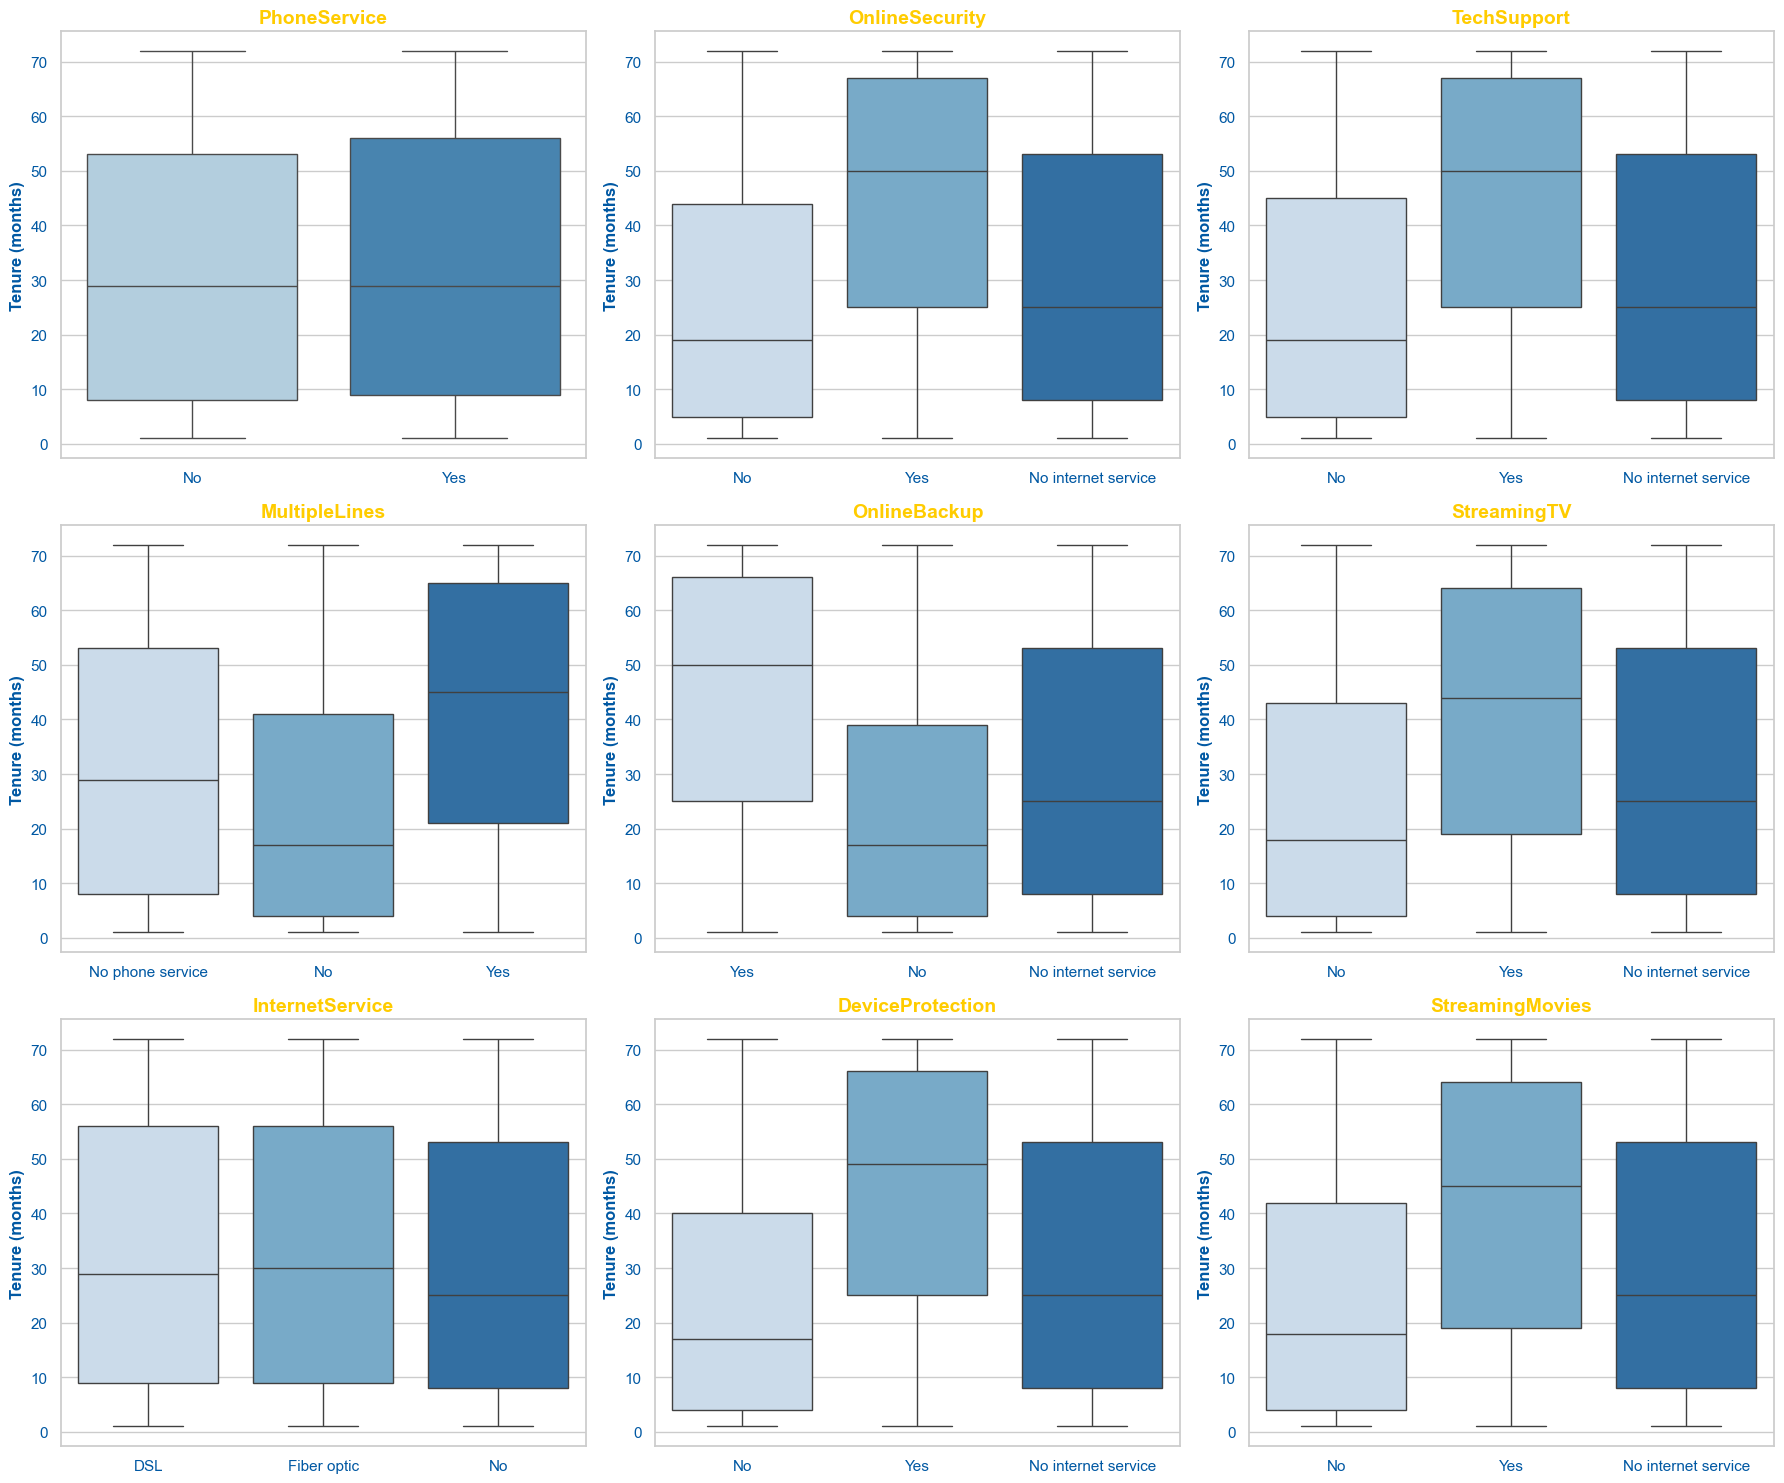

In [30]:

# Define services
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

for i, item in enumerate(services):
    if i < 3:
        ax = sns.boxplot(x=df[item], y=df['tenure'], ax=axes[i, 0], palette='Blues')
    elif i >= 3 and i < 6:
        ax = sns.boxplot(x=df[item], y=df['tenure'], ax=axes[i-3, 1], palette='Blues')
    else:
        ax = sns.boxplot(x=df[item], y=df['tenure'], ax=axes[i-6, 2], palette='Blues')
        
    ax.set_title(item, fontsize=14, fontweight='bold', color=ikea_yellow)
    ax.set_xlabel('')
    ax.set_ylabel('Tenure (months)', fontsize=12, fontweight='bold', color=ikea_blue)
    ax.tick_params(axis='x', colors=ikea_blue)
    ax.tick_params(axis='y', colors=ikea_blue)

# Adjust layout
plt.tight_layout()
plt.show()


### <span style="color:#3498DB">Question: 請問瀏覽上述客戶所接受的各種服務，你有什麼想法</span>

## D. Look at 'Churn' and understand its interaction with other important variables

In [31]:
P = dataset.groupby('Churn')['customerID'].count().reset_index()
P['Percentage'] = 100 * P['customerID']  / P['customerID'].sum()
P

Churn  customerID  Percentage
0    No        5163   73.421502
1   Yes        1869   26.578498

### D-1 Churn vs Tenure:

### <span style="color:#3498DB">Question: 請問在多久的tenure客戶，churn的可能性較高？</span>

<Axes: xlabel='Churn', ylabel='tenure'>

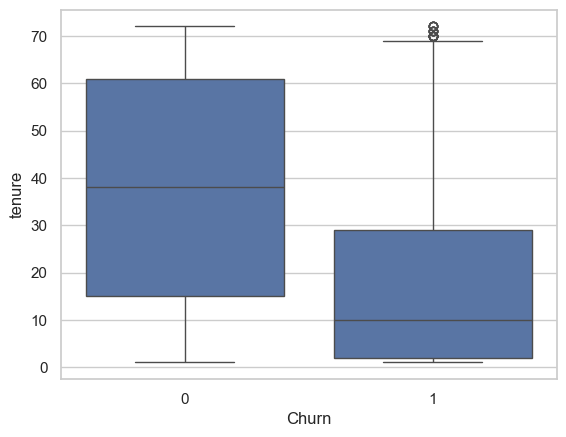

In [32]:
sns.boxplot(x = df.Churn, y = df.tenure)

### D-2 Churn by Contract Type

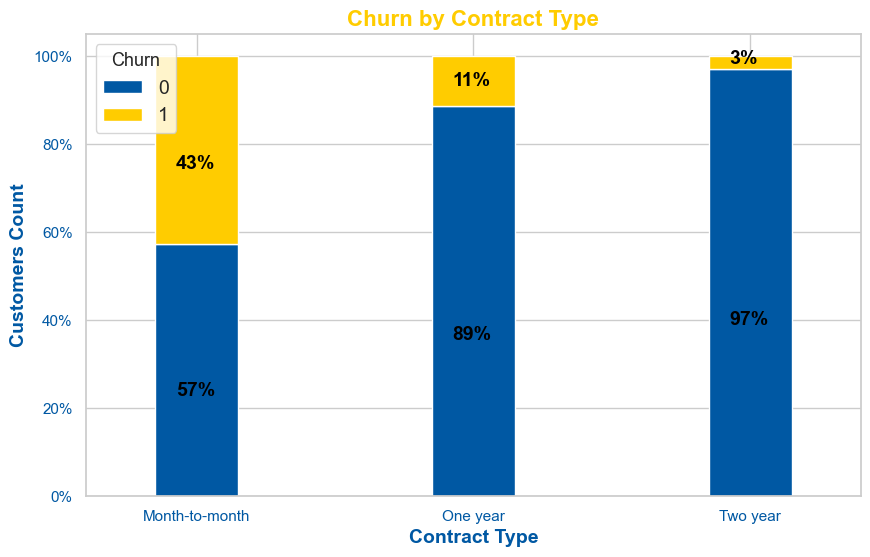

In [33]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Set IKEA-style colors
ikea_blue = '#0058A3'
ikea_yellow = '#FFCC00'
colors = [ikea_blue, ikea_yellow]

# Create the churn by contract type plot
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(kind='bar', width=0.3, stacked=True,
                                                                rot=0, figsize=(10, 6), color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best', prop={'size':14}, title='Churn', title_fontsize='13')
ax.set_ylabel('Customers Count', size=14, fontweight='bold', color=ikea_blue)
ax.set_xlabel('Contract Type', size=14, fontweight='bold', color=ikea_blue)
ax.set_title('Churn by Contract Type', size=16, fontweight='bold', color=ikea_yellow)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                    color='black', weight='bold', size=14)

# Customize tick parameters
ax.tick_params(axis='x', colors=ikea_blue)
ax.tick_params(axis='y', colors=ikea_blue)

# Show plot
plt.show()


### D-3 Churn by Seniority

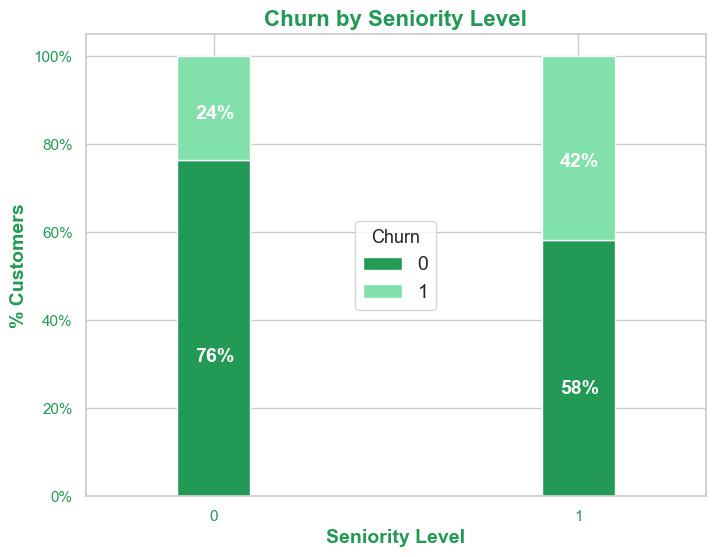

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Set IKEA-style colors
ikea_green = '#229954'
ikea_light_green = '#82E0AA'
colors = [ikea_green, ikea_light_green]

# Create the churn by seniority level plot
seniority_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                  width=0.2,
                                                                  stacked=True,
                                                                  rot=0,
                                                                  figsize=(8, 6),
                                                                  color=colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center', prop={'size':14}, title='Churn', title_fontsize='13')
ax.set_ylabel('% Customers', size=14, fontweight='bold', color=ikea_green)
ax.set_xlabel('Seniority Level', size=14, fontweight='bold', color=ikea_green)
ax.set_title('Churn by Seniority Level', size=16, fontweight='bold', color=ikea_green)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.annotate('{:.0f}%'.format(height), (p.get_x() + 0.25 * width, p.get_y() + 0.4 * height),
                    color='white', weight='bold', size=14)

# Customize tick parameters
ax.tick_params(axis='x', colors=ikea_green)
ax.tick_params(axis='y', colors=ikea_green)

# Show plot
plt.show()


In [35]:
df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

Churn             0     1
SeniorCitizen            
0              4497  1393
1               666   476

### D-4 Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

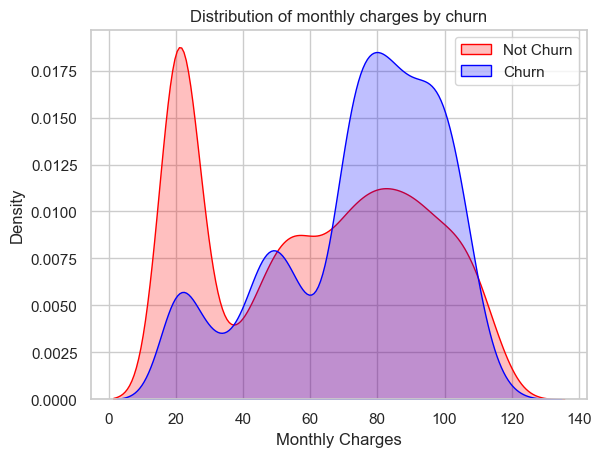

In [36]:
ax = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

### D-5 Churn by Total Charges

Text(0.5, 1.0, 'Distribution of total charges by churn')

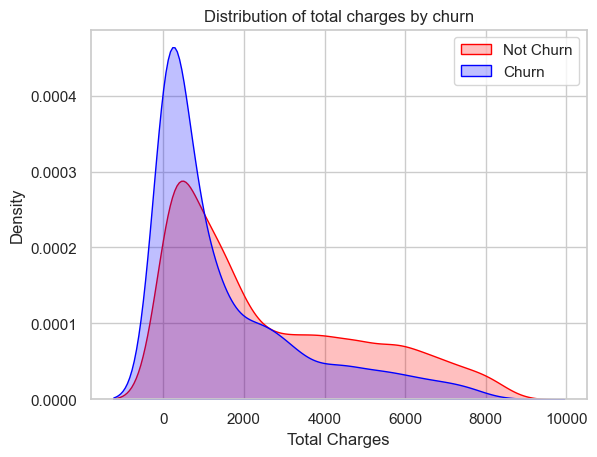

In [37]:
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

# 3. Modeling

In [38]:
df_dummies.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender_Female  gender_Male  \
0       1           29.85         29.85      0           True        False   
1      34           56.95       1889.50      0          False         True   
2       2           53.85        108.15      1          False         True   
3      45           42.30       1840.75      0          False         True   
4       2           70.70        151.65      1           True        False   

   SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  Dependents_No  \
0             True            False       False         True           True   
1             True            False        True        False           True   
2             True            False        True        False           True   
3             True            False        True        False           True   
4             True            False        True        False           True   

   Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0           False             True             False             False   
1           False            False              True              True   
2           False            False              True              True   
3           False             True             False             False   
4           False            False              True              True   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                            True              False                 True   
1                           False              False                 True   
2                           False              False                 True   
3                            True              False                 True   
4                           False              False                False   

   InternetService_Fiber optic  InternetService_No  OnlineSecurity_No  \
0                        False               False               True   
1                        False               False              False   
2                        False               False              False   
3                        False               False              False   
4                         True               False               True   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  OnlineBackup_No  \
0                               False               False            False   
1                               False                True             True   
2                               False                True            False   
3                               False                True             True   
4                               False               False             True   

   OnlineBackup_No internet service  OnlineBackup_Yes  DeviceProtection_No  \
0                             False              True                 True   
1                             False             False                False   
2                             False              True                 True   
3                             False             False                False   
4                             False             False                 True   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                 False                 False            True   
1                                 False                  True            True   
2                                 False                 False            True   
3                                 False                  True           False   
4                                 False                 False            True   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                            False            False            True   
1                            False            False            True   
2                            False            False            True   
3  

In [39]:
# We will use the data frame where we had created dummy variables
X = df_dummies.drop(columns = ['Churn'])
y = df_dummies['Churn'].values

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [40]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 探討不同模型預測結果

## 3-1 Logistic Regression

In [41]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
result = model_log.fit(X_train, y_train)


In [42]:
from sklearn import metrics
y_test_pred_log = model_log.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred_log))

0.814498933901919


Text(0.5, 20.049999999999997, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

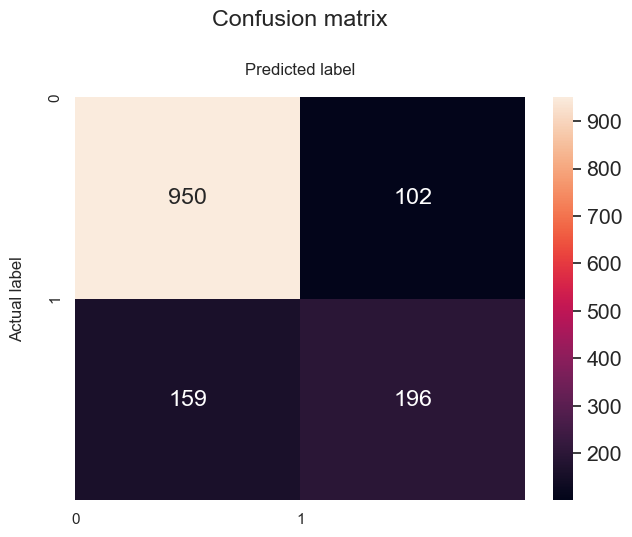

In [43]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_log) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [44]:
# TP=196, FP=102, FN=159, TN=950

print(f'Accuracy : {round((196+950)/(196+102+950+159),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((196)/(196+102), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((196)/(196+159), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((950)/(950+102), 3)}')            # TN / (TN + FP)

Accuracy : 0.814
Precision : 0.658
Recall/Sensitivity : 0.552
Specificity : 0.903


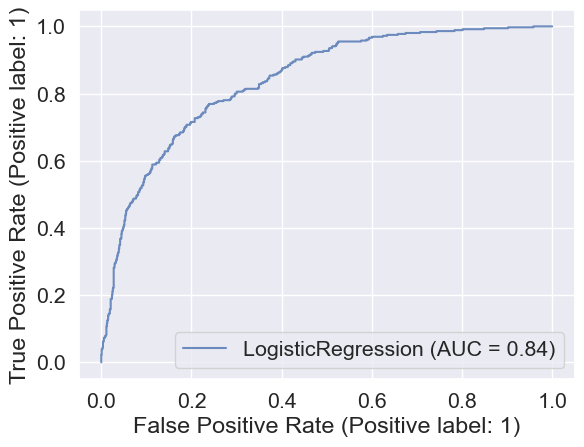

In [45]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### <span style="color:#3498DB">Question: 什麼樣的因素與churn呈現明顯的正向影響與負向影響 </span>

Axes(0.125,0.11;0.775x0.77)


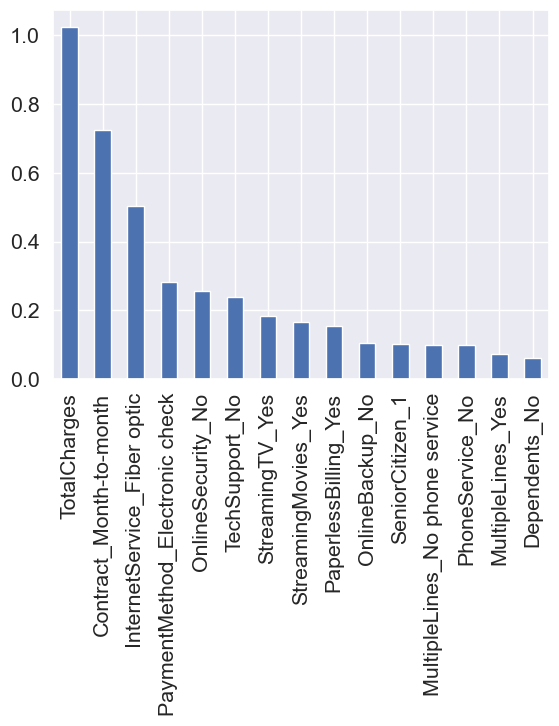

In [46]:
# To get the weights of all the variables
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:15].plot(kind='bar'))

* TotalCharges越高的，流失機會越大
* 擁有1個月的合約期會增加流失流失的機會

Axes(0.125,0.11;0.775x0.77)


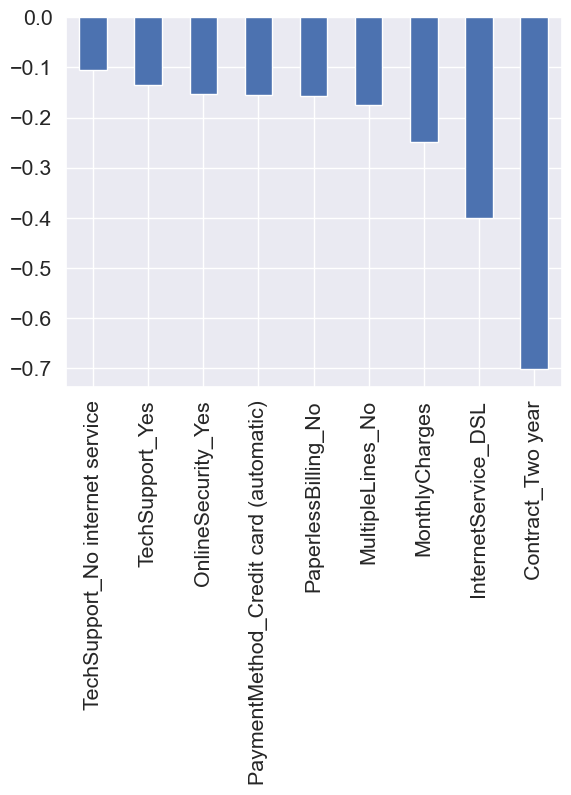

In [47]:
print(weights.sort_values(ascending = False)[-10:-1].plot(kind='bar'))

* 兩年的合約會減少流失率
* 擁有 InternetService DSL的客戶，流失率也會降低

## 3-2 Support Vecor Machine (SVM)


In [48]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf') 
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.8088130774697939

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

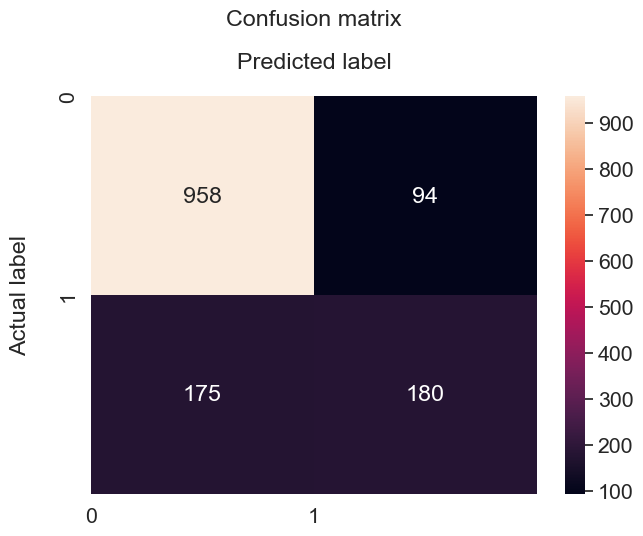

In [49]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [50]:
# TP=180, FP=94, FN=175, TN=958

print(f'Accuracy : {round((180+958)/(180+94+958+175),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((180)/(180+94), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((180)/(180+175), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((958)/(958+94), 3)}')            # TN / (TN + FP)

Accuracy : 0.809
Precision : 0.657
Recall/Sensitivity : 0.507
Specificity : 0.911


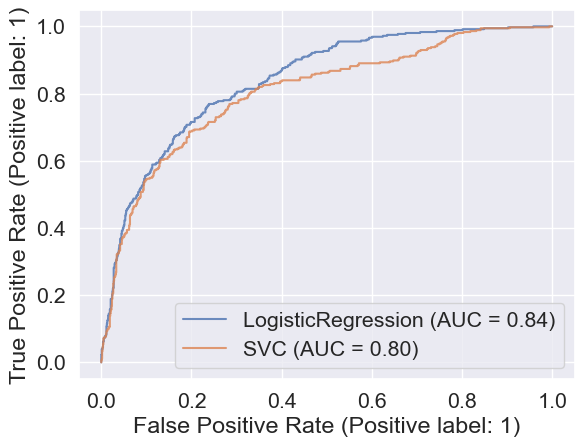

In [51]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest: Selects the top k features based on univariate statistical tests.
preprocessor = make_pipeline(SelectKBest(f_classif, k=10))  # 僅保留好的K個變數
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

In [53]:
SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [54]:
hyper_params_svm = {'svc__gamma':[0.001, 0.0001, 0.0005], 
                    'svc__C':[1, 10, 100, 1000, 3000],}

In [ ]:
# Define multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [55]:
grid_svm = GridSearchCV(SVM, hyper_params_svm, scoring=scoring, refit='recall', cv=3)# GridSearchCV:網格搜索, cv:交叉驗證
grid_svm.fit(X_train, y_train)

# Print the best parameters for the chosen refit metric
print("Best parameters found by GridSearchCV:")
print(grid_svm.best_params_) 

{'svc__C': 10, 'svc__gamma': 0.0005}


In [86]:
# Print detailed classification report for the best model
from sklearn.metrics import classification_report

y_test_pred_gridsvm = grid_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridsvm)

print("Classification report for the best model:")
print(classification_report(y_test, y_test_pred_gridsvm))


Classification report for the best model:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1052
           1       0.65      0.52      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



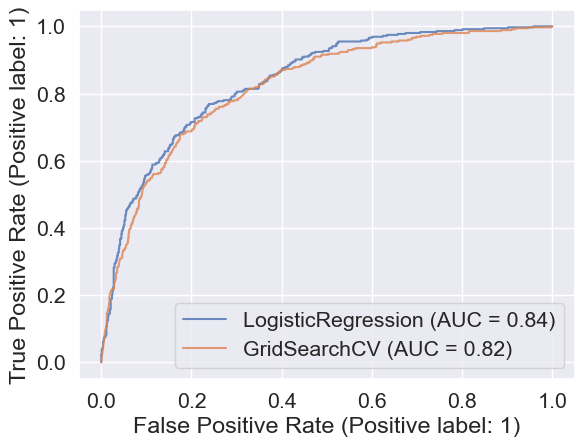

In [57]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_svm_disp = RocCurveDisplay.from_estimator(grid_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## 3-3  Decision Tree (PPT 2.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'gini')  # CART, 默認為gini
clf = model_dt.fit(X_train, y_train)

# Make predictions
y_test_pred_dt = model_dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_dt))

0.7242359630419332


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

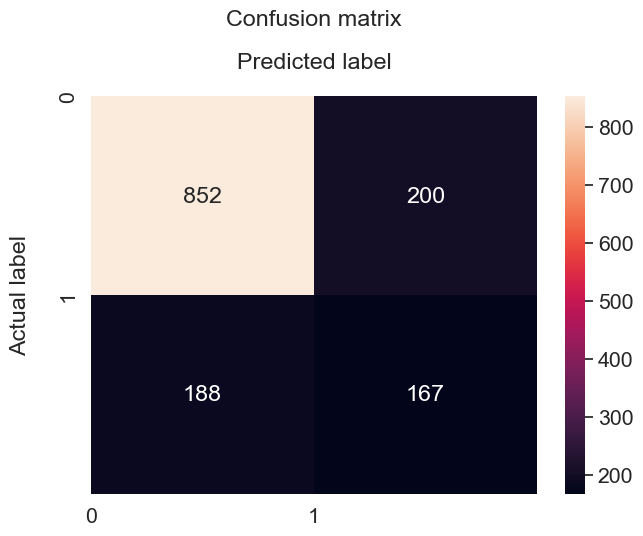

In [59]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_dt) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### Decision Tree Optimization - Pruning

In [60]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=8)) # 挑選出K個分數最高的特徵
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [61]:
DecisionTree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'decisiontreeclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [62]:
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30],    # 最多有多少個leaf nodes
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],  # 要成為leaf nodes，最少需要多少資料
    'decisiontreeclassifier__max_depth': [5,10,15]          # 限制樹的高度最多幾層
}

In [63]:
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=3)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 20, 'decisiontreeclassifier__min_samples_leaf': 15}


In [64]:
y_test_pred_griddt = grid_dt.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_griddt)

0.7953091684434968

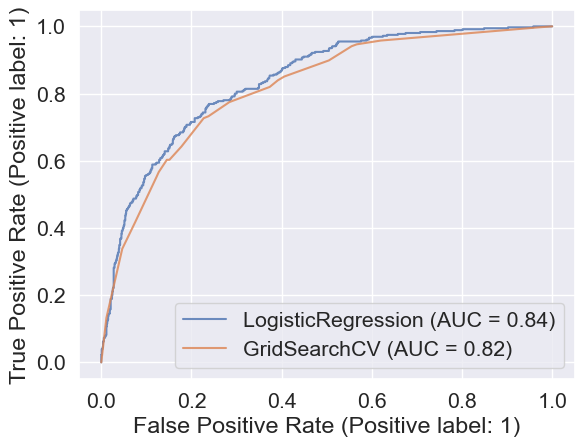

In [65]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### Visualization

In [66]:
from sklearn import tree
print(tree.export_text(model_dt))

# plt.figure(figsize=(16,8))
# tree.plot_tree(model_dt,rounded=True,filled=True)
# plt.show()

|--- feature_37 <= 0.50
|   |--- feature_19 <= 0.50
|   |   |--- feature_1 <= 0.83
|   |   |   |--- feature_44 <= 0.50
|   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |   |--- feature_2 <= 0.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  0.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  0.00
|   |   |   |   |   |--- feature_1 <= 0.49
|   |   |   |   |   |   |--- feature_0 <= 0.82
|   |   |   |   |   |   |   |--- feature_0 <= 0.73
|   |   |   |   |   |   |   |   |--- feature_15 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.40
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  0.40
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|

In [67]:
# !pip3 install six
# !pip3 install pydotplus

In [68]:
# http://www.graphviz.org/download/
# InvocationException: GraphViz's executables not found

In [69]:
# from six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# dot_data = StringIO()
# export_graphviz(model_dt, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())



dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.583219 to fit



## 3-4 Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
y_test_pred_rf = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred_rf))

0.7910447761194029


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

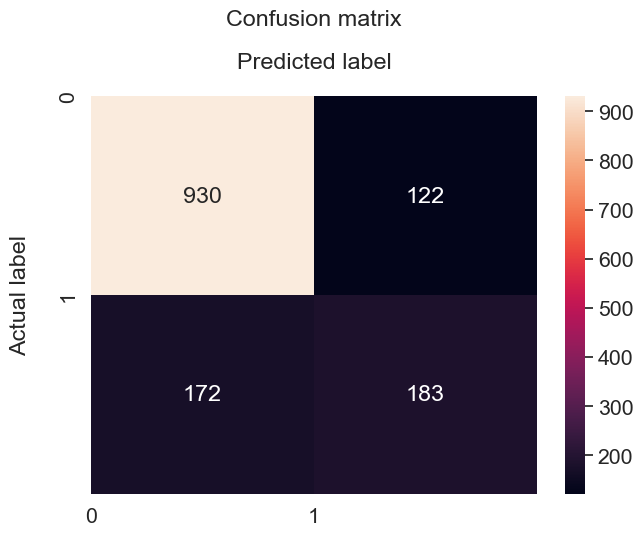

In [71]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_rf) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

### <span style="color:#3498DB">Question: 請自行算出下列衡量標準，並與Logistic regression結果比較 </span>

* Accuracy
* Precision
* Recall/Sensitivity
* Specificity

### <span style="color:#3498DB">Question: 何種原因對churn的重要性最高？請與Logistic Regression相互比較 </span>

<Axes: >

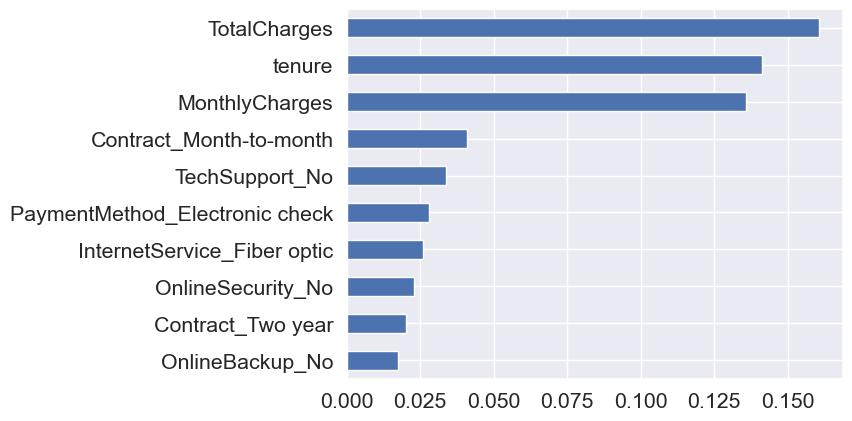

In [72]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

### Random Forest Optimization

* n_estimators: int，森林裡樹木的數量，預設為10     
* max_depth: int或None，樹的最大深度，預設為None     
* bootstrap: 是否隨機抽樣，默認為True     
* max_features: 每個決策樹最大的特徵數量，預設為”auto”，max_features = n_features 
* max_leaf_nodes: 通過限制最大葉子節點數，防止過擬合，默認是"None”。如加了限制，會建立在最大葉子節點數內最優的決策樹。如果特徵不多，可以不考慮這個值

In [73]:
preprocessor = make_pipeline(SelectKBest(f_classif, k=10))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))


In [74]:
RandomForest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [75]:
hyper_params_rf = {"randomforestclassifier__n_estimators":[10,50,100,150,200],
                   "randomforestclassifier__max_depth":[5,10,15,20], 
                   "randomforestclassifier__max_leaf_nodes":[10,20,30]}

In [76]:
grid_rf = GridSearchCV(RandomForest, hyper_params_rf, scoring='recall', cv=3)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)

{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__max_leaf_nodes': 30, 'randomforestclassifier__n_estimators': 150}


In [77]:
y_test_pred_gridrf = grid_rf.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridrf)

0.8031272210376688

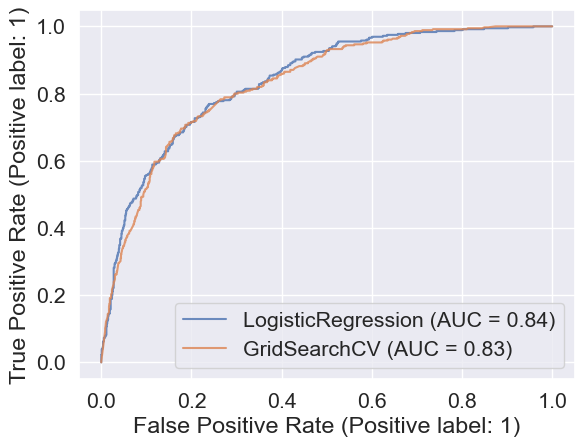

In [78]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_rf_disp = RocCurveDisplay.from_estimator(grid_rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()


## 3.5 XgBoost

In [79]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_test_pred_xg = model_xg.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_xg)

0.7846481876332623

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

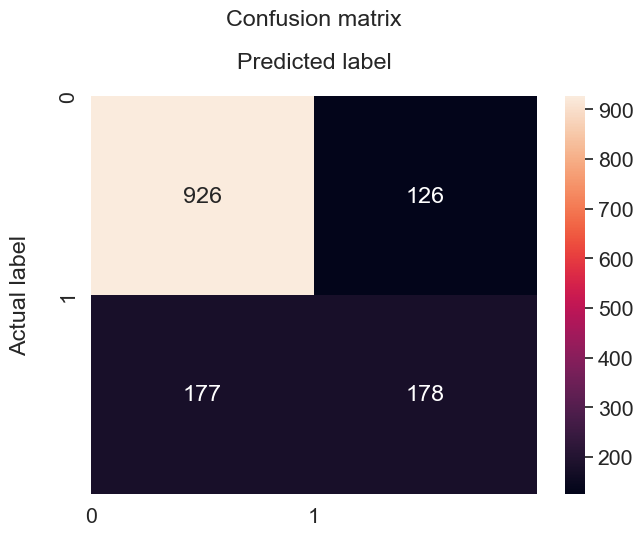

In [80]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xg) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [81]:
# TP=178, FP=126, FN=177, TN=926

print(f'Accuracy : {round((178+926)/(178+126+926+177),3)}')    # (TP + TN) / (TP + FP + TN + FN) 
print(f'Precision : {round((178)/(178+126), 3)}')              # TP / (TP + FP)
print(f'Recall/Sensitivity : {round((178)/(178+177), 3)}')     # TP / (TP + FN)
print(f'Specificity : {round((958)/(958+126), 3)}')            # TN / (TN + FP)

Accuracy : 0.785
Precision : 0.586
Recall/Sensitivity : 0.501
Specificity : 0.884


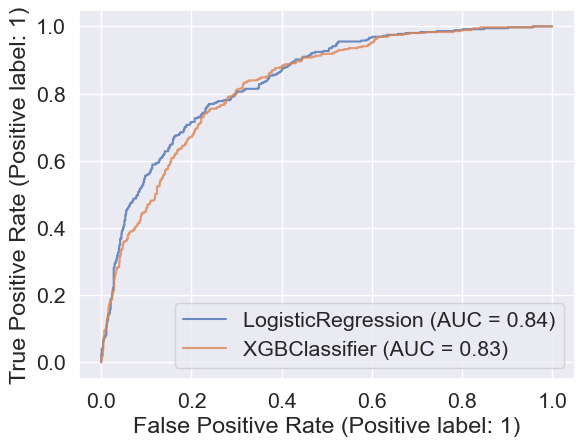

In [82]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
model_xg_disp = RocCurveDisplay.from_estimator(model_xg, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

----------

### <span style="color:#3498DB">Question: 總上四種模型，請問你要選哪個？為何？ </span>